In [ ]:
Zomato_Analysis_API

Consider only Indian restaurants in this analysis -
1.	The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.
•	Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
•	Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.
•	Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
•	Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.
2.	User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
•	Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
1.	Number of Votes given Restaurant
2.	Restaurant serving more number of cuisines.
3.	Average Cost of Restaurant
4.	Restaurant serving some specific cuisines.
•	Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
1.	Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .
3.	Visualization
•	Plot the bar graph top 15 restaurants have a maximum number of outlets.
•	Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
•	Plot the bar graph top 10 restaurants in the data with the highest number of votes.
•	Plot the pie graph of top 10 cuisines present in restaurants in the USA.
•	Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.
Your project will be evaluated on following parameters -
•  Plots and graphs (Max Score 20)
•  Justification (Max Score 20)
•  Answer correctness (Max Score 20)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#loading the file
data=pd.read_csv("zomato.csv",encoding="iso-8859-1")

# First, all countries which are having Country Code as 1 is filtered out.
df=data[data["Country Code"]==1]

#delhi n rest of india except delhi.
res_delhi=(df[(df["City"]=="Gurgaon")|(df["City"]=="New Delhi")|(df["City"]=="Ghaziabad")|(df["City"]=="Noida")|(df["City"]=="Faridabad")] )
res_rest_india=(df[(df["City"]!="Gurgaon")&(df["City"]!="New Delhi")&(df["City"]!="Ghaziabad")&(df["City"]!="Noida")&(df["City"]!="Faridabad")])  

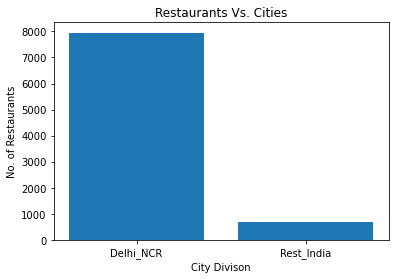

Delhi_NCR_resturant count : 7947
Rest_India_resturant count : 705


In [2]:

###some restaurants can have same name as their branches, concidered different as at different places
# getting the length of Delhi_NCR resturants and Rest_India resturants.

Delhi_NCR=len((res_delhi["Restaurant Name"]))   
Rest_India=len((res_rest_india["Restaurant Name"]))

# plotting the graph

plt.bar(["Delhi_NCR","Rest_India"],[Delhi_NCR,Rest_India])
plt.xlabel("City Divison")
plt.ylabel("No. of Restaurants")
plt.title("Restaurants Vs. Cities")
plt.show()

#printing the count
print("Delhi_NCR_resturant count :", Delhi_NCR)
print("Rest_India_resturant count :", Rest_India)

In [3]:

## finding cuisines served in rest of india but not in delhi
cuisines_delhi=set()
for i in set(res_delhi["Cuisines"]):
    l=i.split(",")
    for j in l:
        cuisines_delhi.add(j.strip())

cuisines_rest_india=set()
for i in set(res_rest_india["Cuisines"]):
    l=i.split(",")
    for j in l:
        cuisines_rest_india.add(j.strip())


common_cuisines=cuisines_delhi.intersection(cuisines_rest_india)
final_ans=[] 
# cuisines served in rest of india but not in delhi
for i in cuisines_rest_india:
    if i not in common_cuisines:
        final_ans.append(i) 
print(*final_ans)

BBQ Cajun German Malwani


In [4]:
# Checking using Zomato API whether this cuisines are actually not served in 
# restaurants of Delhi-NCR or just it due to incomplete dataset.

import requests
parametres={"city_id":1}
r=requests.get("https://developers.zomato.com/api/v2.1/cuisines",params=parametres,headers={"user-key":"53f964f0115fa5df324a07f7609f4eb2","accept":"application/json"})
py=r.json()
lq=[]
for i in py["cuisines"]:
    
    lq.append(i["cuisine"]["cuisine_name"].strip())
lq

['Afghan',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Armenian',
 'Asian',
 'Assamese',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Brazilian',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Cuisine Varies',
 'Desserts',
 'Egyptian',
 'Ethiopian',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'Frozen Yogurt',
 'Garhwali',
 'Goan',
 'Greek',
 'Grocery',
 'Gujarati',
 'Healthy Food',
 'Himachali',
 'Hot dogs',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Iranian',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Malwani',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mishti',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Moroccan',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Easter

In [5]:
## that its due to incomplete dataset

data=r.json()
d=data['cuisines']

for i in d:
    if i['cuisine']['cuisine_name'] == 'Malwani' :
        print(True)
for j in d:
    if j['cuisine']['cuisine_name'] == 'BBQ' :
        print(True)
for k in d:
    if k['cuisine']['cuisine_name'] == 'Cajun' :
        print(True)
#     else:
#         print('not present')
for m in d:
    if m['cuisine']['cuisine_name'] == 'German' :
        print(True)
#     else:
#         print('not present')

True
True


In [6]:
# For Delhi_NCR-- cuisines and no. of restaurants serving these cuisines
all_cuisines_delhi=[]
for i in (res_delhi["Cuisines"]):
    l=i.split(",")
    for j in l:
        all_cuisines_delhi.append(j.strip())
unique,counts=np.unique(all_cuisines_delhi,return_counts=True)


a=counts.argsort()
uni=unique[a]
counts=counts[a]
# making a list of top 10 cuisines served by maximum number of restaurants in Delhi NCR

top_cuisines_ncr=[]


for i in range(-1,-11,-1):
    top_cuisines_ncr.append([uni[i],counts[i]])
    
    print(uni[i],counts[i])

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


In [7]:
#### For Rest of India--  cuisines and no. of restaurants serving these cuisines
all_cuisines_india=[]
for i in (res_rest_india["Cuisines"]):
    l=i.split(",")
    for j in l:
        all_cuisines_india.append(j.strip())
unique,counts=np.unique(all_cuisines_india,return_counts=True)

a=counts.argsort()
uni=unique[a]
counts=counts[a]

# making a list of top 10 cuisines served by maximum number of restaurants in rest of India

top_cuisines__rest_of_india=[]
for i in range(-1,-11,-1):
    top_cuisines__rest_of_india.append([uni[i],counts[i]])
    print(uni[i],counts[i])

North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


In [8]:
cuisines_delhi=set()
for i in set(res_delhi["Cuisines"]):
    l=i.split(",")
    for j in l:
        cuisines_delhi.add(j.strip())
print("types of cuisines in delhi_ncr:",len(cuisines_delhi))
cuisines_rest_india=set()
for i in set(res_rest_india["Cuisines"]):
    l=i.split(",")
    for j in l:
        cuisines_rest_india.add(j.strip())
print("types of cuisines in Rest of India:",len(cuisines_rest_india))

types of cuisines in delhi_ncr: 86
types of cuisines in Rest of India: 70


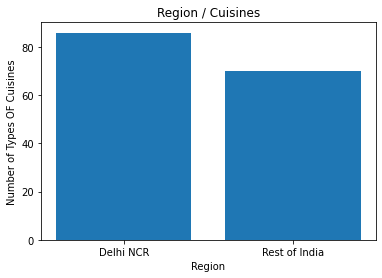

In [9]:
### plotting region against no. of types of cuisines served in that region
no_of_types_cuisines=[len(cuisines_delhi),len(cuisines_rest_india)]
region=["Delhi NCR","Rest of India"]

plt.bar(region,no_of_types_cuisines)
plt.xlabel("Region")
plt.ylabel("Number of Types OF Cuisines")
plt.title("Region / Cuisines")
plt.show()

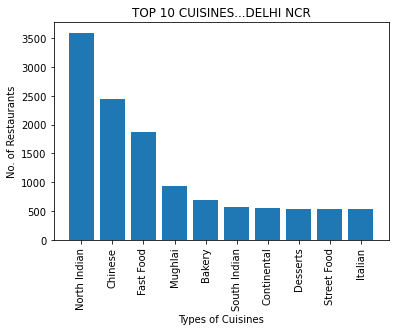

In [10]:
## for delhi types of cuisines
## plotting types of cuisines against number of restaurants serving that cuisine
top_cuisines_ncr=np.array(top_cuisines_ncr)
top_cuisines__rest_of_india=np.array(top_cuisines__rest_of_india)

count_cuisines_ncr=np.array(top_cuisines_ncr[:,1],dtype=int)

#plotting
plt.bar(top_cuisines_ncr[:,0],count_cuisines_ncr)
plt.xticks(rotation=90)
plt.xlabel("Types of Cuisines")
plt.ylabel("No. of Restaurants")
plt.title("TOP 10 CUISINES...DELHI NCR")
plt.show()

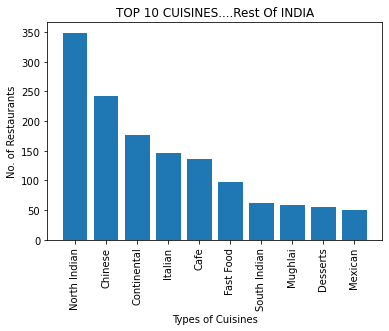

In [11]:
## for REST OF INDIA types of cuisines
## plotting types of cuisines against number of restaurants serving that cuisine

count_cuisines_india=np.array(top_cuisines__rest_of_india[:,1],dtype=int)
plt.bar(top_cuisines__rest_of_india[:,0],count_cuisines_india)
plt.xticks(rotation=90)
plt.xlabel("Types of Cuisines")
plt.ylabel("No. of Restaurants")
plt.title("TOP 10 CUISINES....Rest Of INDIA")
plt.show()

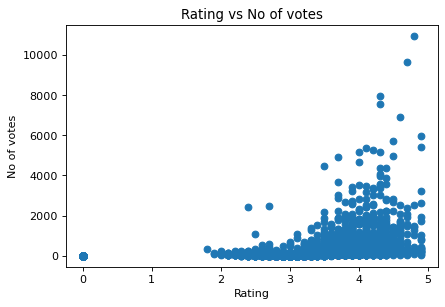

In [27]:
from matplotlib.pyplot import figure
figure(num=None, dpi=80, facecolor='w', edgecolor='green')

plt.scatter(df['Aggregate rating'],df['Votes'])


plt.title('Rating vs No of votes')
plt.ylabel("No of votes")
plt.xlabel("Rating")
plt.show()

Average rating of restaurants serving one cuisine :  2.0550855666774277


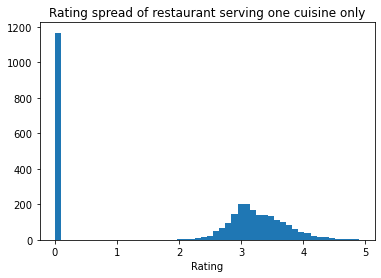

Average rating of restaurants serving multiple cuisine :  2.784374437443748


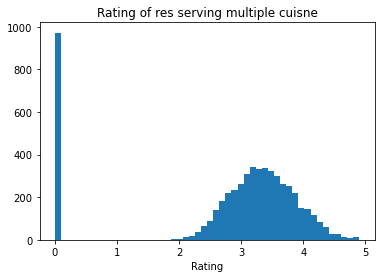

In [34]:

copy_d=df.copy()
# to fill the nan values with Not Known in Cuisines column
copy_d.Cuisines.fillna('Not Known',inplace=True)

#  to find the restaurants in which only one cuisine is present
a=copy_d[~copy_d['Cuisines'].str.contains(',')] 

# to find the restaurants with multiple cuisines
d=copy_d[copy_d['Cuisines'].str.contains(',')]

# printing avg. aggregate rating using mean()
print("Average rating of restaurants serving one cuisine : ",df4['Aggregate rating'].mean())

# setting the figure size
figure(num=None)

# plotting histogram for aggregate rating of restaurants with one cuisine only
plt.hist(a['Aggregate rating'],bins=50)
plt.title('Rating spread of restaurant serving one cuisine only')
plt.xlabel("Rating")
plt.show()

figure(num=None)

print("Average rating of restaurants serving multiple cuisine : ",d['Aggregate rating'].mean())

# plotting histogram for aggregate rating of restaurants - multiple cuisine 

plt.hist(d["Aggregate rating"],bins=50)
plt.title('Rating of res serving multiple cuisne')
plt.xlabel('Rating')
plt.show()

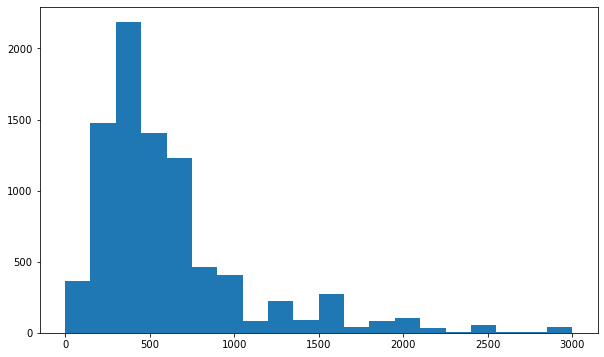

Average Cost for two


In [36]:

figure(num=None, figsize=(10, 6))
plt.hist(df3['Average Cost for two'],range=[0,3000],bins=20)
plt.show()
print('Average Cost for two')

In [37]:
### finding average rating of all restaurants serving specific cuisines
## Restaurants that have zero rating on an average are dropped
Cuisines=df.copy()
def get_list(s):
    s=s.split(",")
    l=[]
    for i in s:
        l.append(i.strip())
    return l
Cuisines["Cuisines"]=Cuisines["Cuisines"].apply(get_list)
Cuisines.reset_index(drop=True,inplace=True)

l=[]
for row in Cuisines.values:
    for j in row[9]:
        l.append([row[17],j.strip()])
    
specific_cuisines=pd.DataFrame(l)
specific_cuisines.columns=["Rating","Cuisines"]

groups=specific_cuisines.groupby("Cuisines")

final_list=[]

for key,group in groups:
    if group["Rating"].mean()!=0.0:
        final_list.append([format(group["Rating"].mean(),".2f"),key])

final_list=np.array(final_list)
x=np.array(final_list[:,1])
y=np.array(final_list[:,0],dtype=float)
ind_min=y.argmin()
ind_max=y.argmax()
# print(x[ind_min],x[ind_max])

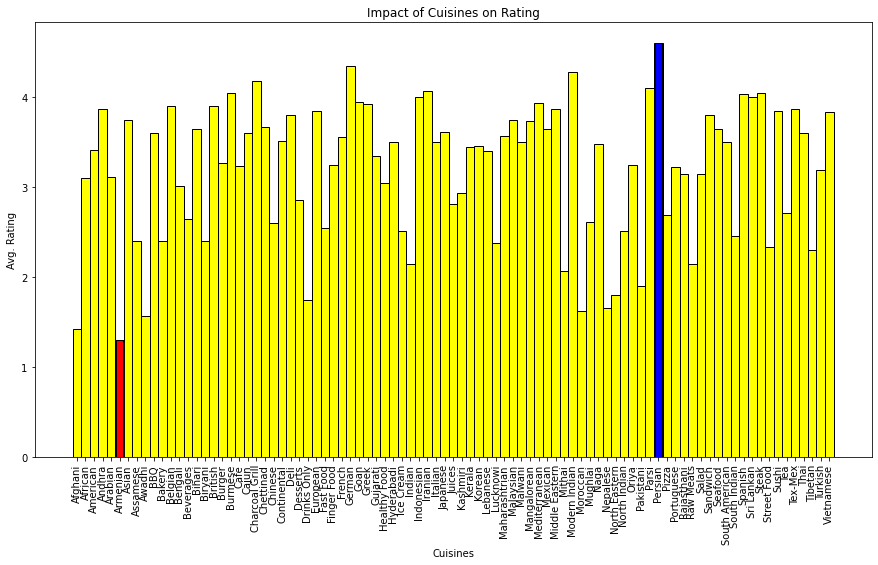

In [39]:
### plotting specific cuisine against average rating
plt.figure(figsize=(15,8))
plt.bar(x,y,width=1,edgecolor="black",color="yellow")
plt.bar(x[ind_min],y.min(),color="red",edgecolor="black")
plt.bar(x[ind_max],y.max(),color="blue",edgecolor="black")
plt.xticks(rotation=90)
plt.xlabel("Cuisines")
plt.ylabel("Avg. Rating")
plt.title("Impact of Cuisines on Rating")
plt.show()

In [18]:
## grouping dataset based on Locality
g=df.groupby("Locality")
ans=[]
for keys,group in g:
    ans.append([((group["Aggregate rating"]*group["Votes"]).sum())/(group["Votes"].sum()),keys.strip()])

weighted=pd.DataFrame(sorted(ans,reverse=True))
weighted.dropna(inplace=True)
weighted.reset_index(drop=True,inplace=True)

for i in range(10):
    print(weighted.values[i][1],weighted.values[i][0])
#### warning is due to zerodivison that might be possible, but that will print nan and we will drop

<ipython-input-18-0c97cf9e218e>:5: RuntimeWarning: invalid value encountered in double_scalars
  ans.append([((group["Aggregate rating"]*group["Votes"]).sum())/(group["Votes"].sum()),keys.strip()])


Aminabad 4.9
Friends Colony 4.886916367367881
Express Avenue Mall,  Royapettah 4.8
Deccan Gymkhana 4.8
Sector 5, Salt Lake 4.707022552098202
Chittoor Road 4.6
Arambol 4.6
Marathahalli 4.57508238276299
Anjuna 4.5446681580909765
Ellis Bridge 4.438470451911935


In [19]:
## considering same name restaurants at different places to be as one restaurants,

## finding restaurants along with number of cuisines served in that restarants all over the country
grouping=df.groupby("Restaurant Name")

ans=[]

for key,group in grouping:
    
    distinct_cuisines=set()
    
    for i in group["Cuisines"].values:
        l=i.split(",")
        
        for j in l:
            distinct_cuisines.add(j.strip())
            
    ans.append([len(distinct_cuisines),key.strip()])
    
ans=sorted(ans,reverse=True)

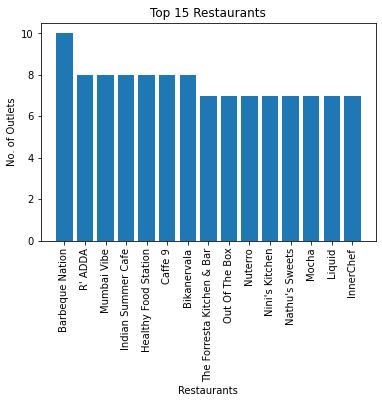

In [41]:
## while plotting bar graph for first 15, some restaurants have same outlets as of 15th number are to be rejected

## as question says for top 15

## plotting restaurants against number of cuisines served in that restaurant

x=[]
y=[]

for row in ans:
    x.append(row[1])
    y.append(row[0])

plt.figure()
plt.bar(x[0:15],y[0:15])
plt.xticks(rotation=90)
plt.xlabel("Restaurants")
plt.ylabel("No. of Outlets")
plt.title("Top 15 Restaurants")
plt.show()

808


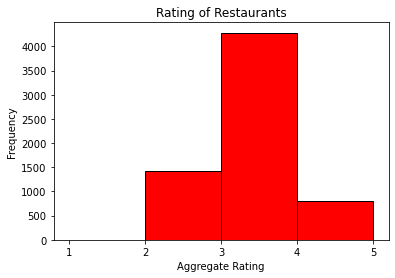

In [42]:
## unrated means restaurants with rating 0.0 are  to be dropped
##plotting frequency of ratings
l=[i for i in range(1,6)]
plt.hist(df["Aggregate rating"],edgecolor="black",color="red",bins=l)
plt.xticks(l)
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.title("Rating of Restaurants")
print((len(df[(df["Aggregate rating"]>=4)&(df["Aggregate rating"]<=5)])))
plt.show()

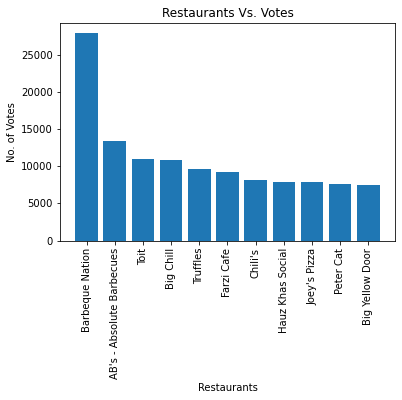

[[27835, 'Barbeque Nation'], [13400, "AB's - Absolute Barbecues"], [10934, 'Toit'], [10853, 'Big Chill'], [9682, 'Truffles'], [9189, 'Farzi Cafe'], [8156, "Chili's"], [7931, 'Hauz Khas Social'], [7807, "Joey's Pizza"], [7574, 'Peter Cat']]


In [22]:
## plotting restaurants against number of votes

## RESTAURANT NAME CAN BE SAME , BUT THEY MAY BE AT DIFFERENT LOCATION,BUT VOTES COUNT HAS TO ADDED
## becoz we are looking distinct restaurants ,considering same restaurants at different locations as same.
votes_res={}
for i in df.values:
    votes_res[i[1].strip()]=votes_res.get(i[1].strip(),0)+i[20] 
    
list_res=[]
for i in votes_res:
    list_res.append([votes_res[i],i])
x=[]
y=[]
list_res=sorted(list_res,reverse=True)
for i in range(11):
    x.append(list_res[i][1].strip())
    y.append(list_res[i][0])
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel("Restaurants")
plt.ylabel("No. of Votes")
plt.title("Restaurants Vs. Votes")
plt.show()
print(list_res[:10])

1 American 22.18
2 Seafood 11.68
3 Sandwich 9.7
4 Pizza 9.7
5 Burger 9.7
6 Steak 8.32
7 Italian 7.52
8 Breakfast 7.33
9 Mexican 7.13
10 Sushi 6.73


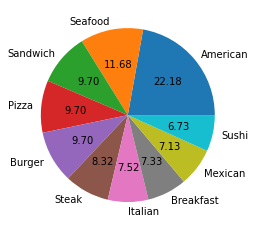

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#loading the file
data=pd.read_csv("zomato.csv",encoding="iso-8859-1")

# First, all countries which are having Country Code as 1 is filtered out.
df=data[data["Country Code"]==1]



zomato_usa_df = data[data['Country Code']==216].copy()
zomato_usa_df['Cuisines'].dropna(inplace=True)
cuisines_count_in_usa = {}

def get_cuisines(cuisines):
    cuisines = str(cuisines)
    if cuisines!="":
        for cuisine in cuisines.split(', '):
            cuisines_count_in_usa[cuisine] = cuisines_count_in_usa.get(cuisine,0)+1
    return cuisines

zomato_usa_df['Cuisines'].apply(get_cuisines)
count_cuisines = [[value,key] for key,value in cuisines_count_in_usa.items()]
count_cuisines.sort(reverse=True)
counts = [i[0] for i in count_cuisines][:10]
cuisine_names = [i[1] for i in count_cuisines][:10]

for i in range(len(cuisine_names)):
    print(i+1,cuisine_names[i],round(100.00*counts[i]/sum(counts),2))
plt.pie(counts,labels=cuisine_names,autopct="%.2f")
plt.show()

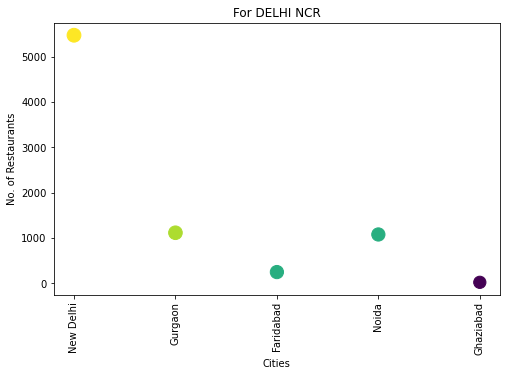

In [24]:
## plotting cities against number of restaurants
##Since given Dataset is skewed towards Delhi NCR, 
##therefore I plotted graphs separately for Delhi NCR and Rest of India.
g=res_delhi.groupby("City")

list_ans=[]


for keys,group in g:
    list_ans.append([((group["Aggregate rating"]*group["Votes"]).sum())/(group["Votes"].sum()),keys.strip(),len(group)])
     
weighted=pd.DataFrame(sorted(list_ans,reverse=True))
weighted.dropna(inplace=True)
weighted.reset_index(drop=True,inplace=True)
 
    ## weighted ratings are multiplied by 50 so that we can see difference in bubble graph,
    # otherwise size would be very small ,becoz want to draw insights not exact decimal representation
sizes=[]
for i in weighted.values[:,0]:
    
    sizes.append(float(format(i,"0.1f"))*50)
    
    
cities=weighted.values[:,1]
count_res=weighted.values[:,2]

plt.figure(figsize=(8,5))

plt.scatter(cities,count_res,s=sizes,c=sizes)
plt.xticks(rotation=90)
plt.xlabel("Cities")
plt.ylabel("No. of Restaurants")
plt.title("For DELHI NCR")
plt.show()

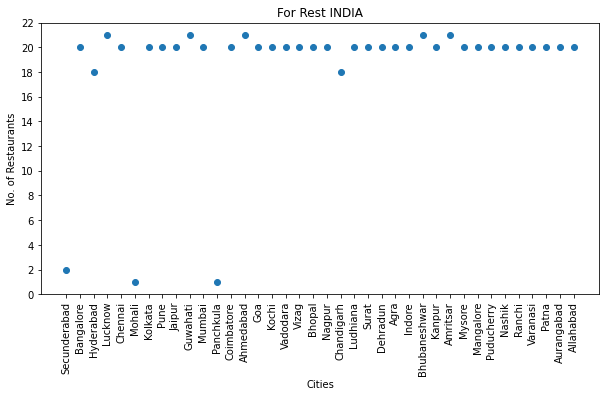

In [44]:
# Plot the bubble graph of a number of Restaurants present in the city of India 
# and keeping the weighted restaurant rating of the city in a bubble


#### gouping data on the basis of city

g=res_rest_india.groupby("City")

list_ans=[]


for keys,group in g:
    list_ans.append([((group["Aggregate rating"]*group["Votes"]).sum())/(group["Votes"].sum()),keys.strip(),len(group)])
     
weighted=pd.DataFrame(sorted(list_ans,reverse=True))
weighted.dropna(inplace=True)
weighted.reset_index(drop=True,inplace=True)
 
    ## weighted ratings are multiplied by 50 so that we can see difference in bubble graph,
    # otherwise size would be very small ,becoz want to draw insights not exact decimal representation
sizes=[]
for i in weighted.values[:,0]:
    
    sizes.append(float(format(i,"0.1f"))*50)
    
    
cities=weighted.values[:,1]

count_res=weighted.values[:,2]

## plotting cities against number of restaurants

plt.figure(figsize=(10,5))

plt.scatter(cities,count_res)
plt.xticks(rotation=90)
plt.xlabel("Cities")
plt.yticks(range(0,24,2))
plt.ylabel("No. of Restaurants")
plt.title("For Rest INDIA")
plt.show()